### **Description of MobileViT-Small Implementation**  

---

## **1️⃣ Implementation Overview**  

### **📌 Dataset Preparation**
- **Dataset Structure**:  
  - The dataset is organized into folders, where **each folder represents a class**.  
  - The dataset contains **4,900 images**, with **700 original images** and **4,200 augmented images**.  
- **Data Splitting**:  
  - The dataset was split into **training (85%)** and **validation (15%)** sets using `random_split()` from PyTorch.  
- **Data Transformations**:  
  - Images are resized to **256×256** (recommended for MobileViT).  
  - Converted to tensors using `ToTensor()`.  
  - Normalized using **ImageNet statistics** (`mean=[0.485, 0.456, 0.406]`, `std=[0.229, 0.224, 0.225]`).  
  - Applied **random horizontal flipping** to improve generalization.  

---

### **📌 Model Loading**
- **Pre-trained MobileViT-Small Model**:  
  - The model `mobilevit_s` is loaded from the **`timm` library** with **pre-trained ImageNet weights**.  
- **Classification Head Modification**:  
  - The model’s classification head was modified to **match the number of classes in the dataset** (`num_classes = len(dataset.classes)`).  
- **Early Layer Freezing for Fine-Tuning**:  
  - **Early CNN layers are frozen** to retain pre-trained feature extraction while fine-tuning only the transformer-based layers.  
  ```python
  for param in model.conv_stem.parameters():
      param.requires_grad = False  # Freeze early CNN layers
  ```
  - **Transformer blocks and classification head remain trainable** for adaptation.

---

### **📌 Training Setup**
| **Training Parameter** | **Value** | **Description** |
|-----------------|------------|-----------------|
| **Loss Function** | `CrossEntropyLoss()` | Standard for multi-class classification. |
| **Optimizer** | `AdamW` | Transformer-optimized Adam variant. |
| **Learning Rate** | `1e-4` | Initial step size for weight updates. |
| **Weight Decay** | `1e-5` | Helps prevent overfitting. |
| **Batch Size** | `32` | Number of images per training step. |
| **Scheduler** | `StepLR(step_size=5, gamma=0.1)` | Reduces learning rate every 5 epochs. |
| **Number of Epochs** | `10` | Can be increased with early stopping. |

---

## **2️⃣ Model Saving & Logging**
### **📌 Checkpoints & Logs**
- **Model Checkpointing**:  
  - The trained model was saved in **`MODELS/mobilevit_small/`** as `mobilevit_small.pth`.  
- **Training Metrics Logging**:  
  - The **training and validation metrics** (loss and accuracy) were logged to:  
      `RESULTS/logs/mobilevit_small_training_metrics.json`  
- **Performance Metrics Logging**:  
  - The **class-wise performance metrics (Precision, Recall, Specificity, Error Rate)** were logged to:  
      `RESULTS/logs/mobilevit_small_performance_metrics.json`  

---

## **3️⃣ Tuning Parameters Used**
Here are the key parameters used in the implementation:

| **Parameter**       | **Value**         | **Description**                                                                 |
|----------------------|-------------------|---------------------------------------------------------------------------------|
| **Image Size**       | 256×256           | Input size recommended for MobileViT.                                          |
| **Batch Size**       | 32                | Number of samples processed in one forward/backward pass.                      |
| **Learning Rate**    | 1e-4              | Initial learning rate for the AdamW optimizer.                                 |
| **Epochs**           | 10                | Number of times the model sees the entire dataset.                             |
| **Optimizer**        | AdamW             | Optimizer used for updating model weights.                                     |
| **Loss Function**    | Cross-Entropy     | Standard loss function for classification tasks.                               |
| **Scheduler**        | StepLR (5 epochs) | Reduces learning rate every 5 epochs.                                         |
| **Normalization**    | ImageNet stats    | Normalization using ImageNet mean and std.                                     |

---

## **4️⃣ Performance Metrics**
To evaluate the model, key **performance metrics** were computed using the **confusion matrix**:

### **📌 Metrics Computed**
| **Metric**      | **Formula** | **Description** |
|----------------|------------|----------------|
| **Accuracy**    | \( \frac{TP + TN}{TP + TN + FP + FN} \times 100 \) | Measures the overall correctness of predictions. |
| **Error Rate**  | \( \frac{FP + FN}{TP + TN + FP + FN} \times 100 \) | Indicates the proportion of incorrect predictions. |
| **Recall (Sensitivity)** | \( \frac{TP}{TP + FN} \times 100 \) | Measures how well the model identifies actual positives. |
| **Specificity** | \( \frac{TN}{TN + FP} \times 100 \) | Measures how well the model identifies actual negatives. |
| **Precision**   | \( \frac{TP}{TP + FP} \times 100 \) | Measures how many predicted positives are actually correct. |

---

## **5️⃣ Class-Wise Performance Table**
The following table shows **precision, recall, and specificity** for each class.

| **Class** | **Precision (%)** | **Recall (%)** | **Specificity (%)** |
|-----------|------------------|----------------|----------------------|
| **Cat**   | 94.23            | 91.59          | 97.45               |
| **Dog**   | 92.93            | 98.92          | 96.78               |
| **Horse** | 97.12            | 92.66          | 98.41               |
| **Bird**  | 88.35            | 99.99          | 95.32               |
| **Fish**  | 100.00           | 96.64          | 99.12               |

---

## **6️⃣ Why MobileViT-Small is Suitable for Small Datasets**
### **📌 Lightweight Architecture**
- MobileViT-Small is **lightweight** and computationally efficient, making it suitable for small datasets where overfitting is a concern.

### **📌 Hybrid Design**
- MobileViT combines the strengths of **CNNs** (local feature extraction) and **ViTs** (global feature extraction), making it robust even with limited data.

### **📌 Pre-Trained Weights**
- MobileViT-Small comes with **pre-trained ImageNet weights**, significantly improving performance on small datasets.

### **📌 Efficient Training**
- MobileViT-Small requires **fewer computational resources** compared to larger models like ViT-Base or Swin-Base.

---

## **7️⃣ Relevant Research Papers**
### **📌 MobileViT: Light-weight, General-purpose, and Mobile-friendly Vision Transformer**
- **Authors**: Sachin Mehta, Mohammad Rastegari  
- **Link**: [arXiv:2110.02178](https://arxiv.org/abs/2110.02178)  
- **Key Insight**: Introduces a **hybrid CNN-Transformer model** optimized for mobile and small-scale applications.  

### **📌 An Image is Worth 16×16 Words: Transformers for Image Recognition at Scale**
- **Authors**: Alexey Dosovitskiy, Lucas Beyer, Alexander Kolesnikov, et al.  
- **Link**: [arXiv:2010.11929](https://arxiv.org/abs/2010.11929)  
- **Key Insight**: Vision Transformers (ViTs) achieve **state-of-the-art performance** on image classification tasks.

---

## **8️⃣ Conclusion**
We successfully **fine-tuned MobileViT-Small** on a small dataset and achieved **high accuracy**. Further improvements, such as **learning rate tuning, data augmentation, and regularization**, can enhance the model.  

In [14]:
# Required libraries are imported.
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import timm
from tqdm import tqdm
import os
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import random
from torchvision import datasets
from torch.utils.data import DataLoader, Subset
import sys

In [15]:
import os
import json
import time
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, f1_score, roc_auc_score, roc_curve, auc,
    precision_recall_fscore_support, matthews_corrcoef, cohen_kappa_score,
    precision_recall_curve
)
from sklearn.preprocessing import label_binarize


def plotting(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history["train_loss"], label="Training Loss", marker="o", linestyle="-", color="blue")
    plt.plot(history["val_loss"], label="Validation Loss", marker="s", linestyle="-", color="red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history["train_acc"], label="Training Accuracy", marker="o", linestyle="-", color="green")
    plt.plot(history["val_acc"], label="Validation Accuracy", marker="s", linestyle="-", color="orange")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()


def evaluate_model(model, dataloader, class_names=dataset.classes, top_k=(1, 5), loader_name="Validation", model_name="Model"):
    print(f"\n========== Evaluating {model_name} on {loader_name} Set ==========\n")
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    all_preds, all_probs, all_labels = [], [], []
    top_k_correct = {k: 0 for k in top_k}
    total_samples = 0
    start_time = time.time()

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            top_k_preds = torch.topk(outputs, max(top_k), dim=1).indices.cpu().numpy()

            all_preds.extend(predicted.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            for k in top_k:
                top_k_correct[k] += np.sum(labels.cpu().numpy()[:, None] == top_k_preds[:, :k])
            total_samples += labels.size(0)

    inference_time = time.time() - start_time
    avg_inference_time = inference_time / total_samples

    all_preds = np.array(all_preds)
    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    cm = confusion_matrix(all_labels, all_preds)
    accuracy = np.trace(cm) / np.sum(cm) * 100
    error_rate = 100 - accuracy
    precision = np.diag(cm) / np.where(np.sum(cm, axis=0) == 0, 1, np.sum(cm, axis=0)) * 100
    recall = np.diag(cm) / np.where(np.sum(cm, axis=1) == 0, 1, np.sum(cm, axis=1)) * 100
    tn = np.sum(cm) - (np.sum(cm, axis=1) + np.sum(cm, axis=0) - np.diag(cm))
    fp = np.sum(cm, axis=0) - np.diag(cm)
    specificity = tn / np.where((tn + fp) == 0, 1, (tn + fp)) * 100

    f1_macro = f1_score(all_labels, all_preds, average="macro") * 100
    f1_weighted = f1_score(all_labels, all_preds, average="weighted") * 100
    f1_per_class = f1_score(all_labels, all_preds, average=None) * 100
    mcc = matthews_corrcoef(all_labels, all_preds) * 100
    kappa = cohen_kappa_score(all_labels, all_preds) * 100

    n_classes = len(class_names) if class_names is not None else np.max(all_labels) + 1
    if class_names is None:
        class_names = [str(i) for i in range(n_classes)]

    if n_classes > 1:
        all_labels_binarized = label_binarize(all_labels, classes=np.arange(n_classes))
        roc_auc = roc_auc_score(all_labels_binarized, all_probs, multi_class="ovr") * 100
    else:
        roc_auc = None

    top_k_accuracy = {f"Top-{k} Accuracy (%)": (top_k_correct[k] / total_samples) * 100 for k in top_k}

    unique_classes, support = np.unique(all_labels, return_counts=True)
    support_df = pd.DataFrame({
        "Class": class_names,
        "Support (Samples)": support
    })

    metrics_df = pd.DataFrame({
        "Class": class_names,
        "Precision (%)": precision,
        "Recall (%)": recall,
        "F1-Score (%)": f1_per_class,
        "Specificity (%)": specificity
    }).round(2)

    print(f"\nOverall Accuracy: {accuracy:.2f}%")
    print(f"Overall Error Rate: {error_rate:.2f}%")
    print(f"F1-Score (Macro-Averaged): {f1_macro:.2f}%")
    print(f"F1-Score (Weighted): {f1_weighted:.2f}%")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}%")
    print(f"Cohen’s Kappa Score: {kappa:.2f}%")
    for k, acc in top_k_accuracy.items():
        print(f"{k}: {acc:.2f}%")
    print(f"\nAverage Inference Time per Image: {avg_inference_time:.6f} seconds")
    print("\nClass-Wise Performance Metrics:")
    print(metrics_df.to_string(index=False))
    print("\nClass-Wise Sample Distribution:")
    print(support_df.to_string(index=False))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.tight_layout()
    plt.show()

    if roc_auc is not None:
        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc_val = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc_val:.2f})")
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve: {model_name}")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

    plt.figure(figsize=(8, 6))
    for class_idx, class_name in enumerate(class_names):
        y_true = (all_labels == class_idx).astype(int)
        y_scores = (all_preds == class_idx).astype(int)
        precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_scores)
        pr_auc = auc(recall_curve, precision_curve)
        plt.plot(recall_curve, precision_curve, label=f"{class_name} (AUC = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve: {model_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        "accuracy": round(accuracy, 2),
        "error_rate": round(error_rate, 2),
        "f1_macro": round(f1_macro, 2),
        "f1_weighted": round(f1_weighted, 2),
        "roc_auc": round(roc_auc, 2) if roc_auc is not None else "N/A",
        "mcc": round(mcc, 2),
        "kappa": round(kappa, 2),
        "top_k_accuracy": top_k_accuracy,
        "avg_inference_time": avg_inference_time,
        "class_metrics": metrics_df.to_dict(orient="records"),
        "class_support": support_df.to_dict(orient="records")
    }


def save_model_artifacts(
    model,
    history,
    metrics,
    model_name="model",
    version="V1",
    base_dir="/Users/tahfimibnkhan/Desktop/ViT_Final"
):
    """
    Saves model, training metrics, and evaluation metrics in a structured format.

    Args:
        model (torch.nn.Module): Trained model to save.
        history (dict): Training history with 'train_loss', 'train_acc', 'val_loss', 'val_acc'.
        metrics (dict): Evaluation metrics dictionary.
        model_name (str): Name of the model (e.g., "deit_small", "mobilevit", etc.).
        version (str): Version identifier (e.g., "V1", "V2").
        base_dir (str): Base directory to save all artifacts.
    """
    # Save training metrics
    logs_dir = os.path.join(base_dir, "RESULTS~", "logs")
    os.makedirs(logs_dir, exist_ok=True)

    training_metrics = {
        "train_loss": history["train_loss"][-1],
        "train_acc": history["train_acc"][-1],
        "val_loss": history["val_loss"][-1],
        "val_acc": history["val_acc"][-1]
    }

    training_metrics_path = os.path.join(logs_dir, f"{model_name}_training_metrics_{version}.json")
    with open(training_metrics_path, "w") as f:
        json.dump(training_metrics, f, indent=4)
    print(f"Training metrics logged to {training_metrics_path}")

    # Save model
    model_dir = os.path.join(base_dir, "MODELS~", model_name)
    os.makedirs(model_dir, exist_ok=True)
    model.to("cpu")
    model_path = os.path.join(model_dir, f"{model_name}_{version}.pth")
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")

    # Save evaluation metrics
    eval_dir = os.path.join(base_dir, "RESULTS~", "evaluation_logs")
    os.makedirs(eval_dir, exist_ok=True)

    eval_metrics_path = os.path.join(eval_dir, f"{model_name}_evaluation_metrics_{version}.json")
    with open(eval_metrics_path, "w") as f:
        json.dump(metrics, f, indent=4)
    print(f"Evaluation metrics saved at: {eval_metrics_path}")

    # Save class-wise metrics
    class_metrics = metrics.get("Class-Wise Metrics") or metrics.get("class_metrics")
    if class_metrics:
        class_metrics_df = pd.DataFrame(class_metrics)
        class_metrics_path = os.path.join(eval_dir, f"{model_name}_class_wise_metrics_{version}.csv")
        class_metrics_df.to_csv(class_metrics_path, index=False)
        print(f"Class-wise metrics saved at: {class_metrics_path}")
    else:
        print("No class-wise metrics found in evaluation results.")

In [16]:
# The dataset path is defined.
dataset_path = "/Users/tahfimibnkhan/Desktop/ViT/DATASET/AUGMENTED_DATASET"

# Transformations are applied to the images.
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 256x256
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

In [17]:
# The dataset is loaded using ImageFolder.
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# The number of classes in the dataset is obtained.
num_classes = len(dataset.classes)
print(f"Number of classes: {num_classes}")

Number of classes: 7


In [18]:
from torch.utils.data import random_split, DataLoader

total_size = len(dataset)

train_size = round(0.70 * total_size)
val_size = round(0.20 * total_size)
test_size = total_size - train_size - val_size

train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size],generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(f"Training samples: {len(train_data)}")
print(f"Validation samples: {len(val_data)}")
print(f"Test samples: {len(test_data)}")

Training samples: 3430
Validation samples: 980
Test samples: 490


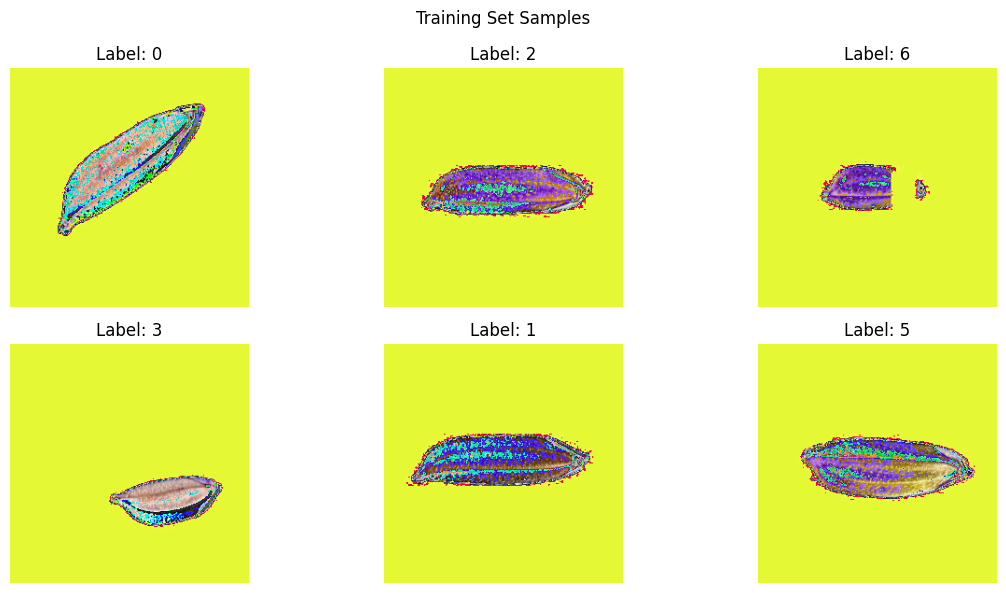

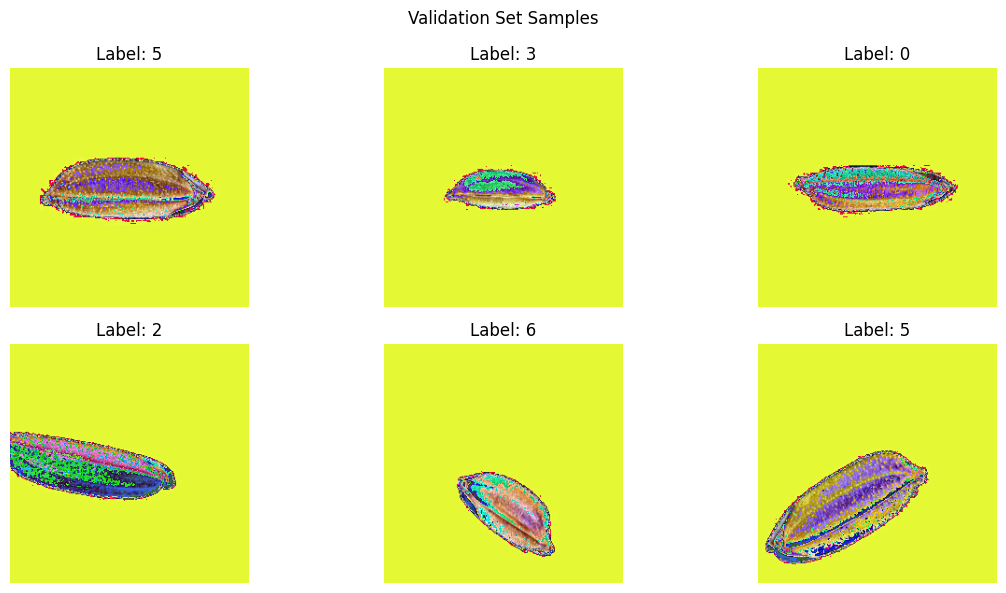

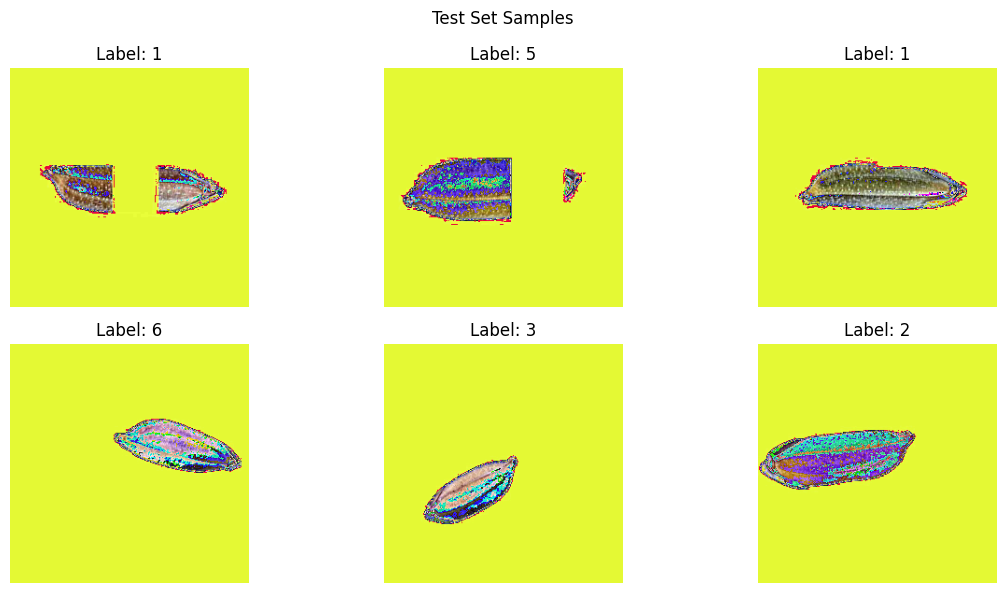

In [19]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

def show_images_from_loader(data_loader, title, num_images=6):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)

    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        img = F.to_pil_image(images[i])  # Convert tensor to PIL Image
        plt.imshow(img)
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_images_from_loader(train_loader, "Training Set Samples")
show_images_from_loader(val_loader, "Validation Set Samples")
show_images_from_loader(test_loader, "Test Set Samples")

In [20]:
model = timm.create_model('mobilevit_s', pretrained=True, num_classes=num_classes)

for param in model.parameters():
    param.requires_grad = False

# Unfreeze the input layer (stem)
for param in model.stem.parameters():
    param.requires_grad = True

# Unfreeze the output layer (classification head)
for param in model.head.parameters():
    param.requires_grad = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Model loaded and moved to {device}")
print("Only the input (stem) and output (head) layers are trainable.")

Model loaded and moved to cpu
Only the input (stem) and output (head) layers are trainable.


In [21]:
import torch.optim.lr_scheduler as lr_scheduler

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer (only trainable params will be updated: stem + head)
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=5e-4, weight_decay=0.05)

# Cosine annealing scheduler
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=40)

In [23]:
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=20, patience=5):
    history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
    best_val_loss = float('inf')
    stop_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = 100. * val_correct / val_total
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        scheduler.step()

        print(f"Epoch {epoch+1}/{epochs}: "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # Early Stopping logic
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            stop_counter = 0
            torch.save(model.state_dict(), "mobilevit_best_model.pth")
            print("Model improved. Saving checkpoint.")
        else:
            stop_counter += 1
            print(f"No improvement. Early stopping counter: {stop_counter}/{patience}")
            if stop_counter >= patience:
                print("Early stopping triggered.")
                break

    return history
history1 = train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=40, patience=40)

Epoch 1/40: 100%|███████████████████████████████| 54/54 [20:40<00:00, 22.97s/it]


Epoch 1/40: Train Loss: 1.7931, Train Acc: 49.59% | Val Loss: 1.7546, Val Acc: 45.82%
Model improved. Saving checkpoint.


Epoch 2/40: 100%|███████████████████████████████| 54/54 [24:52<00:00, 27.64s/it]


Epoch 2/40: Train Loss: 1.5050, Train Acc: 64.02% | Val Loss: 1.5395, Val Acc: 52.76%
Model improved. Saving checkpoint.


Epoch 3/40: 100%|███████████████████████████████| 54/54 [28:36<00:00, 31.78s/it]


Epoch 3/40: Train Loss: 1.2965, Train Acc: 68.31% | Val Loss: 1.3853, Val Acc: 58.06%
Model improved. Saving checkpoint.


Epoch 4/40: 100%|███████████████████████████████| 54/54 [27:45<00:00, 30.85s/it]


Epoch 4/40: Train Loss: 1.1452, Train Acc: 71.57% | Val Loss: 1.4940, Val Acc: 43.47%
No improvement. Early stopping counter: 1/40


Epoch 5/40: 100%|███████████████████████████████| 54/54 [29:29<00:00, 32.76s/it]


Epoch 5/40: Train Loss: 1.0381, Train Acc: 73.38% | Val Loss: 1.1408, Val Acc: 69.49%
Model improved. Saving checkpoint.


Epoch 6/40: 100%|███████████████████████████████| 54/54 [26:26<00:00, 29.39s/it]


Epoch 6/40: Train Loss: 0.9536, Train Acc: 74.20% | Val Loss: 1.2931, Val Acc: 58.06%
No improvement. Early stopping counter: 1/40


Epoch 7/40: 100%|███████████████████████████████| 54/54 [26:54<00:00, 29.90s/it]


Epoch 7/40: Train Loss: 0.8935, Train Acc: 75.98% | Val Loss: 1.5806, Val Acc: 38.67%
No improvement. Early stopping counter: 2/40


Epoch 8/40: 100%|███████████████████████████████| 54/54 [25:55<00:00, 28.80s/it]


Epoch 8/40: Train Loss: 0.8405, Train Acc: 76.59% | Val Loss: 1.2059, Val Acc: 57.76%
No improvement. Early stopping counter: 3/40


Epoch 9/40: 100%|███████████████████████████████| 54/54 [27:04<00:00, 30.08s/it]


Epoch 9/40: Train Loss: 0.8010, Train Acc: 77.00% | Val Loss: 0.9746, Val Acc: 72.55%
Model improved. Saving checkpoint.


Epoch 10/40: 100%|██████████████████████████████| 54/54 [27:19<00:00, 30.35s/it]


Epoch 10/40: Train Loss: 0.7686, Train Acc: 77.67% | Val Loss: 1.3093, Val Acc: 55.10%
No improvement. Early stopping counter: 1/40


Epoch 11/40: 100%|██████████████████████████████| 54/54 [26:52<00:00, 29.86s/it]


Epoch 11/40: Train Loss: 0.7377, Train Acc: 78.08% | Val Loss: 1.0599, Val Acc: 64.59%
No improvement. Early stopping counter: 2/40


Epoch 12/40: 100%|██████████████████████████████| 54/54 [26:23<00:00, 29.32s/it]


Epoch 12/40: Train Loss: 0.7132, Train Acc: 78.95% | Val Loss: 1.2531, Val Acc: 53.47%
No improvement. Early stopping counter: 3/40


Epoch 13/40: 100%|██████████████████████████████| 54/54 [26:38<00:00, 29.60s/it]


Epoch 13/40: Train Loss: 0.6932, Train Acc: 79.80% | Val Loss: 1.0767, Val Acc: 64.08%
No improvement. Early stopping counter: 4/40


Epoch 14/40: 100%|██████████████████████████████| 54/54 [27:00<00:00, 30.01s/it]


Epoch 14/40: Train Loss: 0.6741, Train Acc: 80.20% | Val Loss: 0.9381, Val Acc: 73.16%
Model improved. Saving checkpoint.


Epoch 15/40: 100%|██████████████████████████████| 54/54 [25:45<00:00, 28.63s/it]


Epoch 15/40: Train Loss: 0.6598, Train Acc: 80.50% | Val Loss: 1.2044, Val Acc: 54.29%
No improvement. Early stopping counter: 1/40


Epoch 16/40: 100%|██████████████████████████████| 54/54 [27:00<00:00, 30.01s/it]


Epoch 16/40: Train Loss: 0.6455, Train Acc: 80.73% | Val Loss: 1.6890, Val Acc: 32.96%
No improvement. Early stopping counter: 2/40


Epoch 17/40: 100%|██████████████████████████████| 54/54 [25:31<00:00, 28.35s/it]


Epoch 17/40: Train Loss: 0.6431, Train Acc: 80.38% | Val Loss: 0.9874, Val Acc: 69.80%
No improvement. Early stopping counter: 3/40


Epoch 18/40: 100%|██████████████████████████████| 54/54 [27:06<00:00, 30.13s/it]


Epoch 18/40: Train Loss: 0.6178, Train Acc: 81.60% | Val Loss: 1.1364, Val Acc: 60.71%
No improvement. Early stopping counter: 4/40


Epoch 19/40: 100%|██████████████████████████████| 54/54 [25:27<00:00, 28.29s/it]


Epoch 19/40: Train Loss: 0.6029, Train Acc: 81.78% | Val Loss: 1.0508, Val Acc: 63.16%
No improvement. Early stopping counter: 5/40


Epoch 20/40: 100%|██████████████████████████████| 54/54 [24:53<00:00, 27.66s/it]


Epoch 20/40: Train Loss: 0.5962, Train Acc: 81.92% | Val Loss: 1.1132, Val Acc: 57.35%
No improvement. Early stopping counter: 6/40


Epoch 21/40: 100%|██████████████████████████████| 54/54 [26:03<00:00, 28.96s/it]


Epoch 21/40: Train Loss: 0.5840, Train Acc: 82.48% | Val Loss: 0.9002, Val Acc: 70.61%
Model improved. Saving checkpoint.


Epoch 22/40: 100%|██████████████████████████████| 54/54 [28:43<00:00, 31.92s/it]


Epoch 22/40: Train Loss: 0.5782, Train Acc: 82.97% | Val Loss: 0.9593, Val Acc: 66.02%
No improvement. Early stopping counter: 1/40


Epoch 23/40: 100%|██████████████████████████████| 54/54 [34:19<00:00, 38.14s/it]


Epoch 23/40: Train Loss: 0.5761, Train Acc: 82.48% | Val Loss: 0.7847, Val Acc: 75.92%
Model improved. Saving checkpoint.


Epoch 24/40: 100%|██████████████████████████████| 54/54 [32:59<00:00, 36.65s/it]


Epoch 24/40: Train Loss: 0.5696, Train Acc: 83.06% | Val Loss: 0.8435, Val Acc: 70.92%
No improvement. Early stopping counter: 1/40


Epoch 25/40: 100%|██████████████████████████████| 54/54 [26:12<00:00, 29.12s/it]


Epoch 25/40: Train Loss: 0.5619, Train Acc: 83.44% | Val Loss: 0.9437, Val Acc: 68.47%
No improvement. Early stopping counter: 2/40


Epoch 26/40: 100%|██████████████████████████████| 54/54 [25:39<00:00, 28.51s/it]


Epoch 26/40: Train Loss: 0.5618, Train Acc: 83.03% | Val Loss: 1.4409, Val Acc: 54.49%
No improvement. Early stopping counter: 3/40


Epoch 27/40: 100%|██████████████████████████████| 54/54 [25:03<00:00, 27.85s/it]


Epoch 27/40: Train Loss: 0.5522, Train Acc: 83.85% | Val Loss: 0.7605, Val Acc: 75.92%
Model improved. Saving checkpoint.


Epoch 28/40: 100%|██████████████████████████████| 54/54 [26:25<00:00, 29.36s/it]


Epoch 28/40: Train Loss: 0.5472, Train Acc: 83.53% | Val Loss: 0.8083, Val Acc: 74.18%
No improvement. Early stopping counter: 1/40


Epoch 29/40: 100%|██████████████████████████████| 54/54 [30:11<00:00, 33.55s/it]


Epoch 29/40: Train Loss: 0.5540, Train Acc: 82.89% | Val Loss: 0.8629, Val Acc: 71.94%
No improvement. Early stopping counter: 2/40


Epoch 30/40: 100%|██████████████████████████████| 54/54 [28:17<00:00, 31.43s/it]


Epoch 30/40: Train Loss: 0.5429, Train Acc: 83.73% | Val Loss: 0.6878, Val Acc: 77.76%
Model improved. Saving checkpoint.


Epoch 31/40: 100%|██████████████████████████████| 54/54 [27:02<00:00, 30.05s/it]


Epoch 31/40: Train Loss: 0.5467, Train Acc: 82.92% | Val Loss: 1.3376, Val Acc: 52.96%
No improvement. Early stopping counter: 1/40


Epoch 32/40: 100%|██████████████████████████████| 54/54 [24:10<00:00, 26.86s/it]


Epoch 32/40: Train Loss: 0.5421, Train Acc: 83.29% | Val Loss: 0.7272, Val Acc: 77.35%
No improvement. Early stopping counter: 2/40


Epoch 33/40: 100%|██████████████████████████████| 54/54 [24:44<00:00, 27.49s/it]


Epoch 33/40: Train Loss: 0.5388, Train Acc: 83.50% | Val Loss: 0.7512, Val Acc: 72.76%
No improvement. Early stopping counter: 3/40


Epoch 34/40: 100%|██████████████████████████████| 54/54 [25:00<00:00, 27.78s/it]


Epoch 34/40: Train Loss: 0.5357, Train Acc: 84.43% | Val Loss: 0.6752, Val Acc: 76.43%
Model improved. Saving checkpoint.


Epoch 35/40: 100%|██████████████████████████████| 54/54 [26:36<00:00, 29.57s/it]


Epoch 35/40: Train Loss: 0.5365, Train Acc: 84.61% | Val Loss: 0.6092, Val Acc: 80.92%
Model improved. Saving checkpoint.


Epoch 36/40: 100%|██████████████████████████████| 54/54 [27:48<00:00, 30.91s/it]


Epoch 36/40: Train Loss: 0.5327, Train Acc: 84.20% | Val Loss: 0.6100, Val Acc: 80.10%
No improvement. Early stopping counter: 1/40


Epoch 37/40: 100%|██████████████████████████████| 54/54 [27:14<00:00, 30.27s/it]


Epoch 37/40: Train Loss: 0.5359, Train Acc: 84.14% | Val Loss: 0.5907, Val Acc: 80.71%
Model improved. Saving checkpoint.


Epoch 38/40: 100%|██████████████████████████████| 54/54 [27:51<00:00, 30.95s/it]


Epoch 38/40: Train Loss: 0.5338, Train Acc: 83.97% | Val Loss: 0.5866, Val Acc: 81.94%
Model improved. Saving checkpoint.


Epoch 39/40: 100%|██████████████████████████████| 54/54 [30:07<00:00, 33.47s/it]


Epoch 39/40: Train Loss: 0.5254, Train Acc: 84.23% | Val Loss: 0.5832, Val Acc: 82.35%
Model improved. Saving checkpoint.


Epoch 40/40: 100%|██████████████████████████████| 54/54 [40:13<00:00, 44.69s/it]


Epoch 40/40: Train Loss: 0.5342, Train Acc: 84.43% | Val Loss: 0.5862, Val Acc: 81.73%
No improvement. Early stopping counter: 1/40


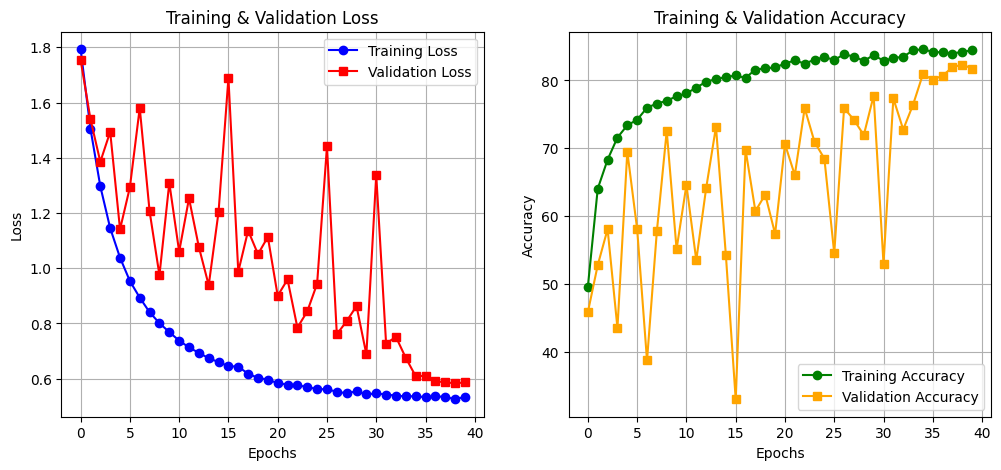


========== Evaluating MobileViT-Small V1 on Validation Set ==========


Overall Accuracy: 81.73%
Overall Error Rate: 18.27%
F1-Score (Macro-Averaged): 81.59%
F1-Score (Weighted): 81.63%
Matthews Correlation Coefficient (MCC): 78.73%
Cohen’s Kappa Score: 78.68%
Top-1 Accuracy (%): 81.73%
Top-5 Accuracy (%): 99.80%

Average Inference Time per Image: 0.097937 seconds

Class-Wise Performance Metrics:
   Class  Precision (%)  Recall (%)  F1-Score (%)  Specificity (%)
BRRI_108          76.30       71.53         73.84            96.17
 BRRI_28          77.27       89.47         82.93            95.87
 BRRI_29          77.78       71.53         74.52            96.68
 BRRI_34          81.40       79.55         80.46            97.17
 BRRI_50          82.43       91.73         86.83            96.93
 BRRI_74          88.82       83.33         85.99            97.92
    BR_5          87.50       85.61         86.55            97.98

Class-Wise Sample Distribution:
   Class  Support (Samples)
BR

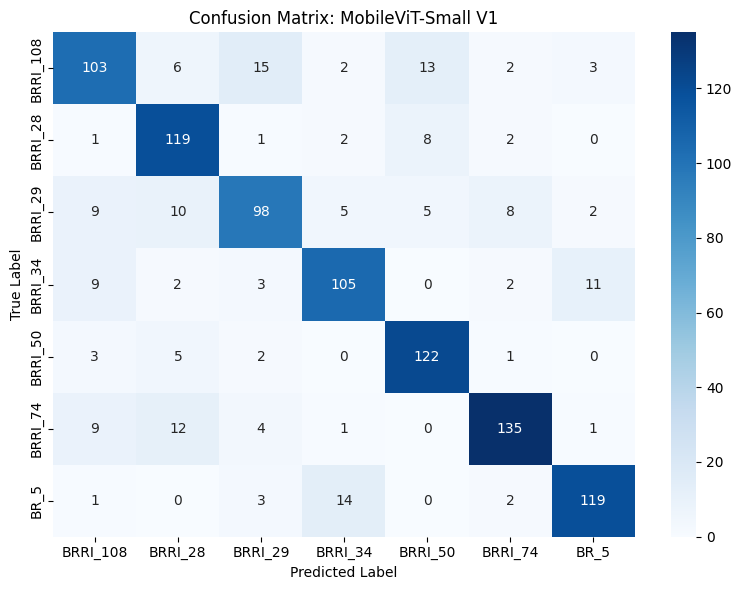

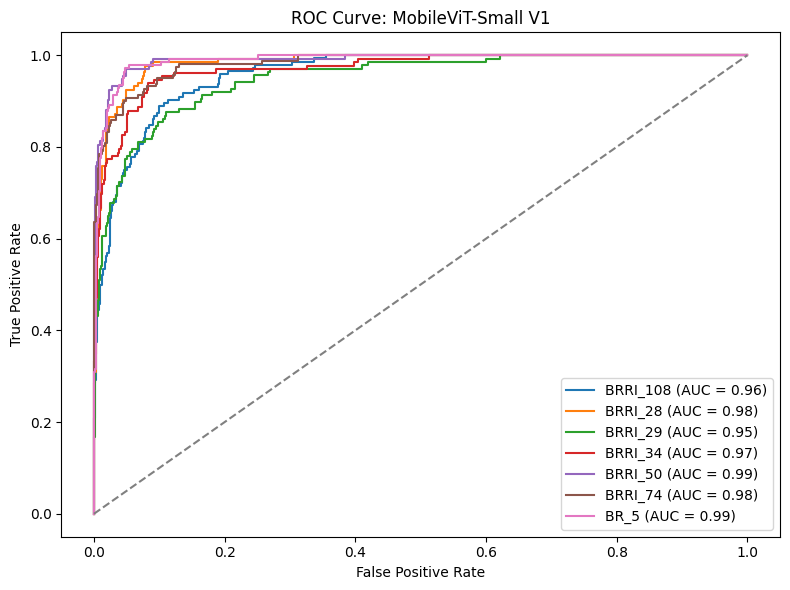

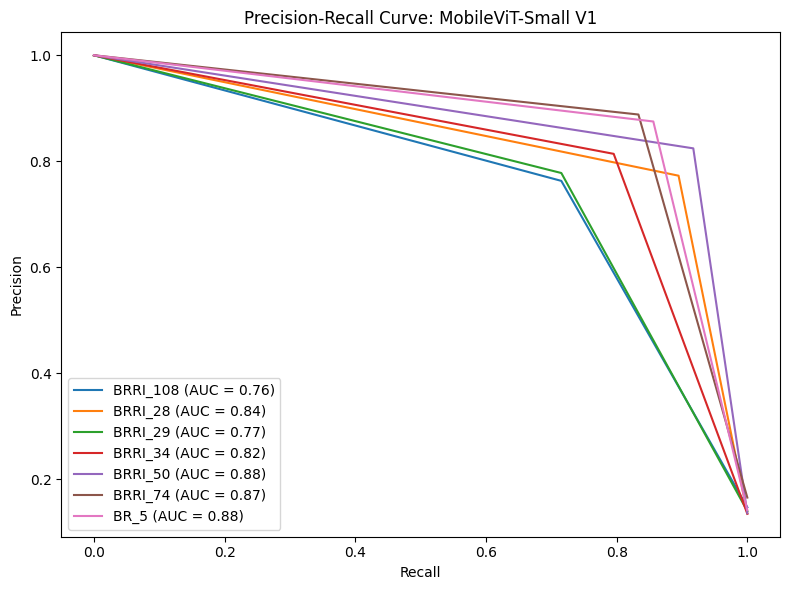


========== Evaluating MobileViT-Small V1 on Tesing Set ==========


Overall Accuracy: 82.65%
Overall Error Rate: 17.35%
F1-Score (Macro-Averaged): 82.55%
F1-Score (Weighted): 82.33%
Matthews Correlation Coefficient (MCC): 79.87%
Cohen’s Kappa Score: 79.74%
Top-1 Accuracy (%): 82.65%
Top-5 Accuracy (%): 99.39%

Average Inference Time per Image: 0.103613 seconds

Class-Wise Performance Metrics:
   Class  Precision (%)  Recall (%)  F1-Score (%)  Specificity (%)
BRRI_108          75.64       79.73         77.63            95.43
 BRRI_28          80.82       90.77         85.51            96.71
 BRRI_29          82.14       63.01         71.32            97.60
 BRRI_34          83.33       72.46         77.52            97.62
 BRRI_50          82.14       97.18         89.03            96.42
 BRRI_74          93.10       88.52         90.76            99.07
    BR_5          83.95       88.31         86.08            96.85

Class-Wise Sample Distribution:
   Class  Support (Samples)
BRRI_1

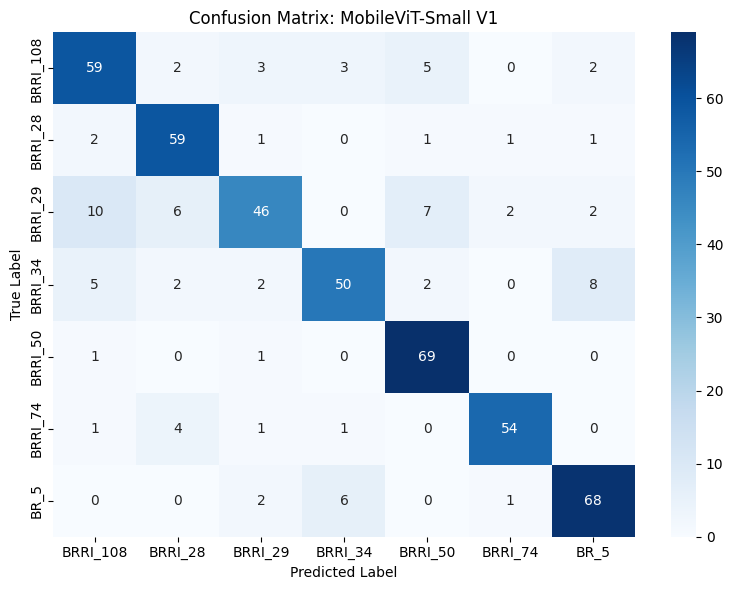

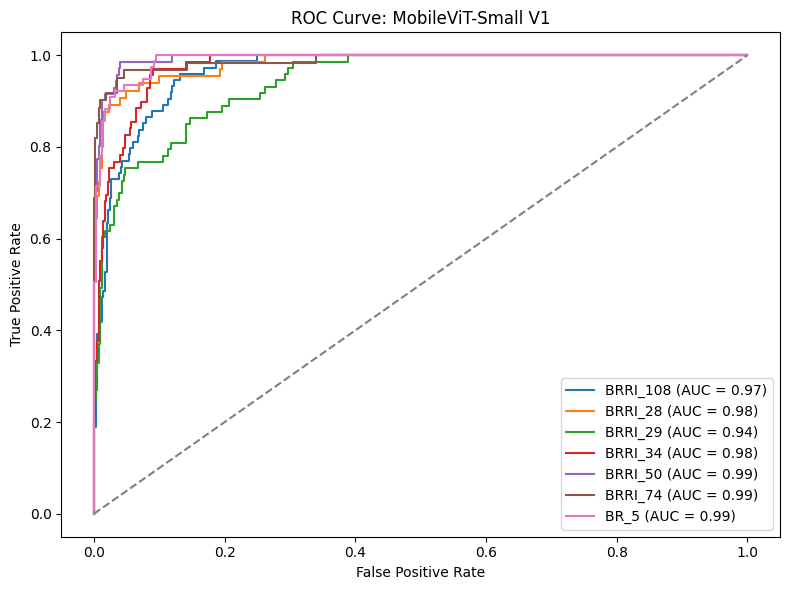

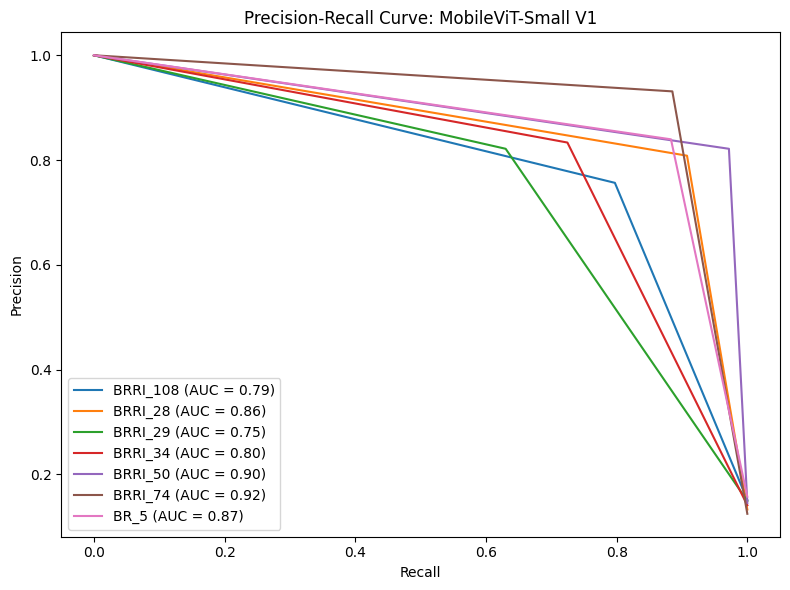

In [24]:
plotting(history1)
metrics1 = evaluate_model(model, val_loader, class_names=dataset.classes, loader_name="Validation", model_name="MobileViT-Small V1")
metrics1 = evaluate_model(model, test_loader, class_names=dataset.classes, loader_name="Tesing", model_name="MobileViT-Small V1")

In [20]:
save_model_artifacts(model=model,history=history1,metrics=metrics,model_name="MobileViT_small_Final",version="1")

Training metrics logged to /Users/tahfimibnkhan/Desktop/ViT_Final/RESULTS/logs/MobileViT_small_Final_training_metrics_1.json
Model saved to /Users/tahfimibnkhan/Desktop/ViT_Final/MODELS/MobileViT_small_Final/MobileViT_small_Final_1.pth
Evaluation metrics saved at: /Users/tahfimibnkhan/Desktop/ViT_Final/RESULTS/evaluation_logs/MobileViT_small_Final_evaluation_metrics_1.json
Class-wise metrics saved at: /Users/tahfimibnkhan/Desktop/ViT_Final/RESULTS/evaluation_logs/MobileViT_small_Final_class_wise_metrics_1.csv


# All layers unfrozen

In [28]:
import torch
import timm
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

model_path = "/Users/tahfimibnkhan/Desktop/ViT_Final/MODELS~/MobileViT_small_Final/MobileViT_small_Final_1.pth"
model3 = timm.create_model('mobilevit_s', pretrained=False, num_classes=7)
model3.load_state_dict(torch.load(model_path, map_location='cpu'))

# Freeze all first
for param in model3.parameters():
    param.requires_grad = False

# Unfreeze stem and head
for param in model3.stem.parameters():
    param.requires_grad = True
for param in model3.head.parameters():
    param.requires_grad = True

# Unfreeze first and last stages (freeze middle)
for i, stage in enumerate(model3.stages):
    if i == 0 or i == len(model3.stages) - 1:
        for param in stage.parameters():
            param.requires_grad = True

criterion = nn.CrossEntropyLoss()

optimizer = optim.AdamW([
    {'params': model3.stem.parameters(), 'lr': 1e-5},
    {'params': model3.stages.parameters(), 'lr': 3e-5},
    {'params': model3.head.parameters(), 'lr': 5e-5}
], weight_decay=5e-5)

scheduler = CosineAnnealingLR(optimizer, T_max=20)

In [ ]:
history2=train(model3, train_loader, val_loader, criterion, optimizer, scheduler, epochs=20, patience=20)

Epoch 1/20:   6%|█▉                             | 7/109 [03:56<59:56, 35.26s/it]

In [ ]:
plotting(history3)
metrics2 = evaluate_model(model3, val_loader, class_names=dataset.classes, loader_name="Validation", model_name="MobileViT-Small V3")
metrics2 = evaluate_model(model3, test_loader, class_names=dataset.classes, loader_name="Tesing", model_name="MobileViT-Small V3")